In [ ]:
from google.colab import drive
import pandas as pd

drive.mount("/content/drive",force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()
import warnings 
warnings.filterwarnings('ignore')


In [ ]:
ORI_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Car_details.csv')

In [ ]:
ORI_data.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


**EDA**


In [ ]:
ORI_data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [ ]:
ORI_data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [ ]:
ORI_data.shape

(8128, 13)

In [ ]:
ORI_data.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [ ]:
ORI_data.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,8128,8128.000000,8.128000e+03,8.128000e+03,8128,8128,8128,8128,7907,7907,7913,7906,7907.000000
unique,2058,NaN,NaN,NaN,4,3,2,5,393,121,322,440,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,129,NaN,NaN,NaN,4402,6766,7078,5289,225,1017,377,530,NaN
mean,NaN,2013.804011,6.382718e+05,6.981951e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.416719
std,NaN,4.044249,8.062534e+05,5.655055e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959588
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.800000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [ ]:
data = ORI_data.drop(['max_power','mileage','name','torque','engine'],axis=1)

In [ ]:
data.shape

(8128, 8)

In [ ]:
data.isnull().sum()

year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
seats            221
dtype: int64

In [ ]:
data.shape[0]

8128

In [ ]:
null_values = pd.DataFrame(round((data.isnull().sum()/data.shape[0])*100,2)).reset_index()
null_values.columns = ['Variable','%Missing_Value']
null_values

,Variable,%Missing_Value
0,year,0.00
1,selling_price,0.00
2,km_driven,0.00
3,fuel,0.00
4,seller_type,0.00
5,transmission,0.00
6,owner,0.00
7,seats,2.72


In [ ]:
# as percentage of missing value is less than 5% so dropping these values 
proc_data = data.dropna(axis=0)
proc_data.shape

(7907, 8)

In [ ]:
proc_data.dtypes

year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
seats            float64
dtype: object

In [ ]:
# let's check the position of catagorical columns
catColumnsPos = [proc_data.columns.get_loc(col) for col in list(proc_data.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(proc_data.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['fuel', 'seller_type', 'transmission', 'owner']
Categorical columns position  : [3, 4, 5, 6]


**let's check the no of unique records for each type of catagorical columns**

```
# This is formatted as code
```



In [ ]:
data[['fuel']].value_counts()

fuel  
Diesel    4402
Petrol    3631
CNG         57
LPG         38
dtype: int64

In [ ]:
data[['seller_type']].value_counts()

seller_type     
Individual          6766
Dealer              1126
Trustmark Dealer     236
dtype: int64

In [ ]:
data[['transmission']].value_counts()

transmission
Manual          7078
Automatic       1050
dtype: int64

In [ ]:
data[['owner']].value_counts()

owner               
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
dtype: int64

### Outliers handling

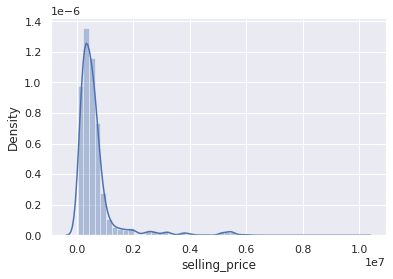

In [ ]:
sns.distplot(proc_data['selling_price'])

In [ ]:
# by looking at above garph we can say that there are some outliers in the data (as garph is positively skewed) but with less density

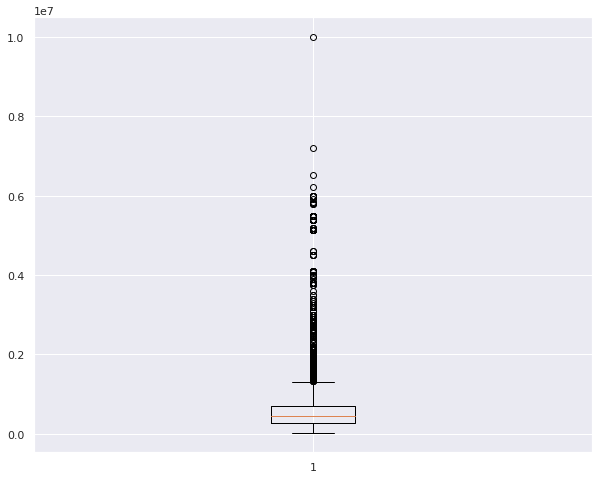

In [ ]:
# checking the outliers in data with boxplot
plt.figure(figsize=(10,8))
plt.boxplot(proc_data['selling_price'])
plt.show()

In [ ]:
# checking outliers with inter quartile method

Q1 = np.percentile(proc_data['selling_price'] , 25)
Q3 = np.percentile(proc_data['selling_price'] , 75)
IQR = Q3 - Q1
ul = Q3+1.5*IQR
ll = Q1-1.5*IQR

outliers = proc_data['selling_price'][(proc_data['selling_price'] > ul) | (proc_data['selling_price'] < ll)]
outliers

41      2100000
47      1500000
49      1450000
55      1650000
57      1750000
         ...   
7949    1400000
7967    1500000
7973    1400000
8058    1689999
8108    1575000
Name: selling_price, Length: 598, dtype: int64

In [ ]:
#removing outliers
new_data = proc_data[(proc_data['selling_price'] < ul) & (proc_data['selling_price'] > ll)]
new_data.shape

(7309, 8)

In [ ]:
new_data.describe()

,year,selling_price,km_driven,seats
count,7309.000000,7.309000e+03,7.309000e+03,7309.000000
mean,2013.714325,4.598465e+05,7.188674e+04,5.407443
std,3.867459,2.572333e+05,5.756106e+04,0.959685
min,1994.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.500000e+05,3.500000e+04,5.000000
50%,2014.000000,4.250000e+05,6.500000e+04,5.000000
75%,2017.000000,6.250000e+05,1.000000e+05,5.000000
max,2020.000000,1.300000e+06,2.360457e+06,14.000000


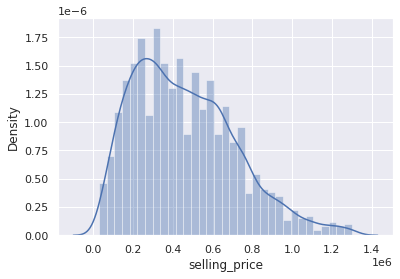

In [ ]:
sns.distplot(new_data['selling_price'])

In [ ]:
# let's remove the outliers for other numerical columns 

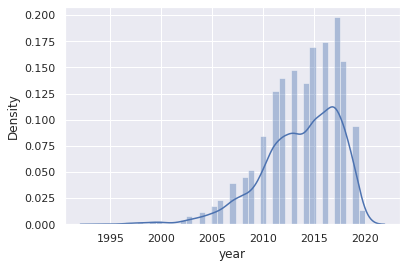

In [ ]:
sns.distplot(new_data['year'])

In [ ]:
Q1 = np.percentile(new_data['year'] , 25)
Q3 = np.percentile(new_data['year'] , 75)
IQR = Q3 - Q1
ul = Q3+1.5*IQR
ll = Q1-1.5*IQR

outliers2 = new_data['year'][(new_data['year'] > ul) | (new_data['year'] < ll)]
outliers2

7       2001
177     1999
186     2000
808     2000
999     1999
1025    2000
1379    2001
1468    1999
1474    1994
1775    2000
1882    2000
2140    2000
2145    2001
2327    1998
2340    1999
2424    1997
2818    2001
2886    2000
3046    1998
3378    2000
3890    1995
4033    2001
4108    1996
4112    2000
4253    1999
4285    1998
4372    1998
4712    1994
4933    2000
5080    1999
5349    1999
5411    1997
5610    1998
5681    2000
5702    1997
5714    1997
5726    1997
5746    2001
5965    2000
5992    2000
6164    1997
6320    1998
6387    1999
6436    1998
6521    1999
6639    1999
6919    1999
6920    1999
6933    1996
7218    1997
7471    1999
7524    2000
7765    1998
7935    1999
7958    2000
7982    2000
8025    1998
8042    1997
8115    1997
Name: year, dtype: int64

In [ ]:
new_data1 = new_data[(new_data['year'] < ul) & (new_data['year'] > ll)]
new_data1.shape

(7231, 8)

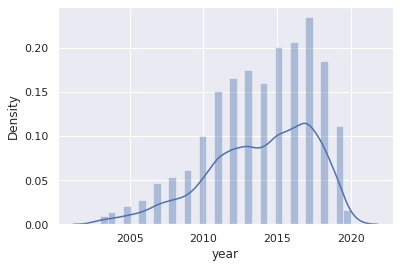

In [ ]:
sns.distplot(new_data1['year'])

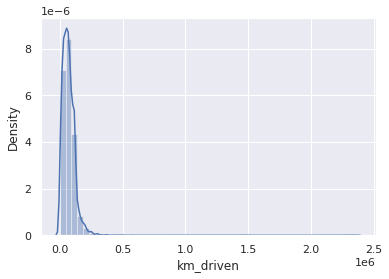

In [ ]:
sns.distplot(new_data1['km_driven'])

In [ ]:
Q1 = np.percentile(new_data1['km_driven'] , 25)
Q3 = np.percentile(new_data1['km_driven'] , 75)
IQR = Q3 - Q1
ul = Q3+1.5*IQR
ll = Q1-1.5*IQR

outliers3 = new_data1['km_driven'][(new_data1['km_driven'] > ul) | (new_data1['km_driven'] < ll)]
outliers3

287     207890
394     240000
396     214000
397     214000
401     265000
         ...  
7969    250000
8030    300000
8033    200000
8071    200000
8077    250000
Name: km_driven, Length: 152, dtype: int64

In [ ]:
new_data2 = new_data1[(new_data1['km_driven'] < ul) & (new_data1['km_driven'] > ll)]
new_data2.shape

(7079, 8)

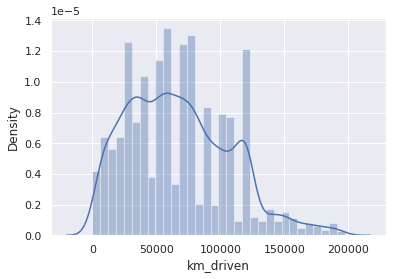

In [ ]:
sns.distplot(new_data2['km_driven'])

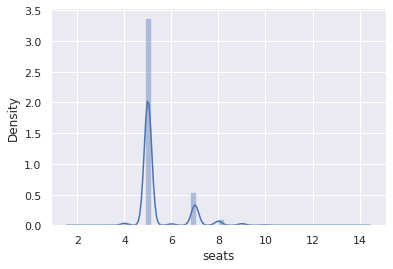

In [ ]:
sns.distplot(new_data2['seats'])
# from line 48 we can see that seats column is having nearly 0 std deviation so we can say that this column is not having many outliers

In [ ]:
# unable to remove outlier with IQR for seats so removing it with quantile method
q = new_data2['seats'].quantile(0.99)
data_2 = new_data2[new_data2['seats']<q]
data_2.shape

(6989, 8)

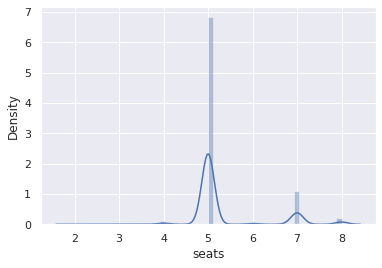

In [ ]:
sns.distplot(data_2['seats'])

In [ ]:
data_cleaned = data_2.reset_index(drop=True)
data_cleaned.describe()

,year,selling_price,km_driven,seats
count,6989.000000,6.989000e+03,6989.000000,6989.000000
mean,2013.952783,4.645585e+05,67021.013593,5.340821
std,3.569500,2.565039e+05,39699.030289,0.823781
min,2003.000000,3.150400e+04,1.000000,2.000000
25%,2012.000000,2.549990e+05,35000.000000,5.000000
50%,2015.000000,4.300000e+05,60000.000000,5.000000
75%,2017.000000,6.300000e+05,93000.000000,5.000000
max,2020.000000,1.300000e+06,197000.000000,8.000000


**Assumptions of linear regression**

**Linearity**

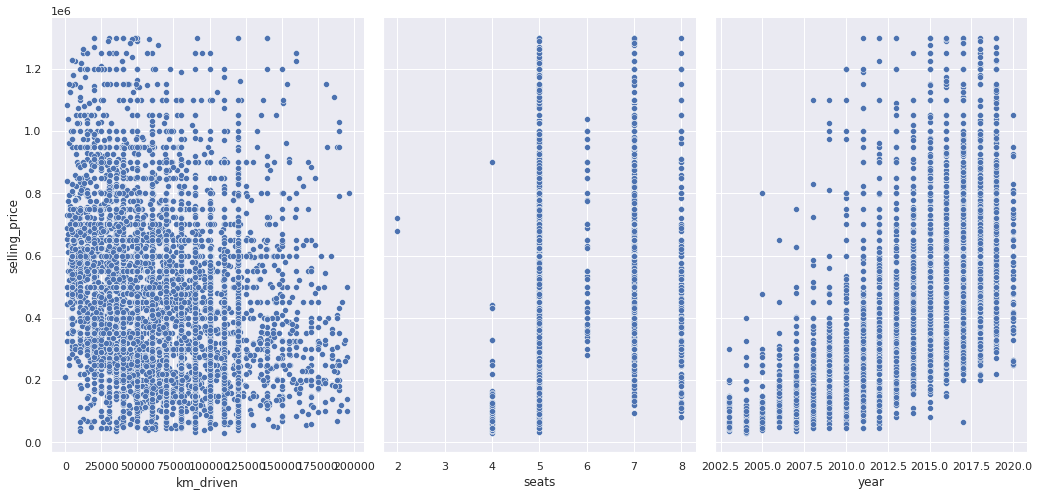

In [ ]:
p = sns.pairplot(data_cleaned, x_vars=['km_driven','seats','year'], y_vars='selling_price', size=7, aspect=0.7)

In [ ]:

from sklearn.model_selection import train_test_split

y = data_cleaned['selling_price']

X = data_cleaned.drop(['selling_price'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

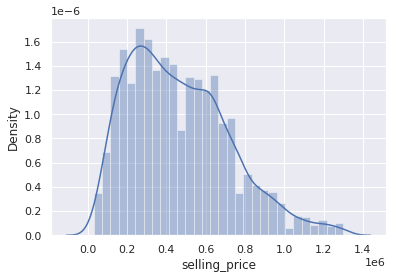

In [ ]:
sns.distplot(y_train)

In [ ]:
y_train = np.log(y_train)

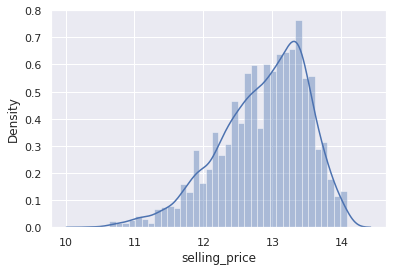

In [ ]:
sns.distplot(y_train, hist=True, kde=True, bins=40)
plt.show()

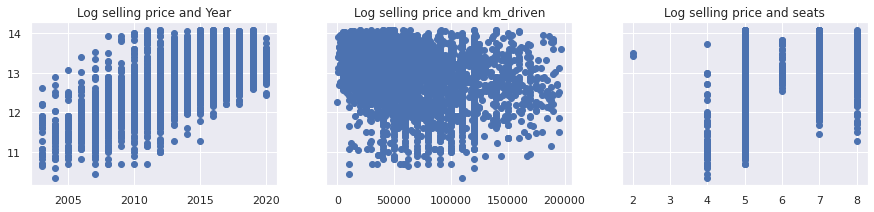

In [ ]:
# Let's check the three scatters once again
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(X_train['year'],y_train)
ax1.set_title('Log selling price and Year')
ax2.scatter(X_train['km_driven'],y_train)
ax2.set_title('Log selling price and km_driven')
ax3.scatter(X_train['seats'],y_train)
ax3.set_title('Log selling price and seats')


plt.show()

# from above graphs the relationships doesn't show any kind of linear relationship so we fail to check first assumption of linear regression analysis
#So it shows that a linear regression fitting might not be the best model for it


In [ ]:
# To check for the rest of the assumptions for that firstly let's perform regression on it.

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_train.head()

,year,km_driven,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Third Owner
1885,2013,60000,5.0,1,0,0,1,0,1,0,0,0
2951,2019,7032,5.0,0,0,1,0,1,0,0,0,0
5487,2008,180000,5.0,1,0,0,1,0,1,0,1,0
192,2015,125000,7.0,1,0,0,1,0,1,0,0,0
3829,2018,60000,5.0,1,0,0,1,0,1,0,1,0


In [ ]:
X_train.shape

(5241, 12)

In [ ]:

cols = X_train.columns
cols

Index(['year', 'km_driven', 'seats', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Third Owner'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train = scaler.transform(X_train)

In [ ]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_hat = reg.predict(X_train)

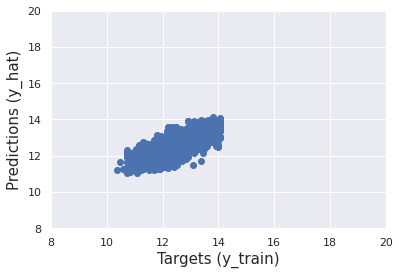

In [ ]:
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=15)
plt.ylabel('Predictions (y_hat)',size=15)
plt.xlim(8,20)
plt.ylim(8,20)
plt.show()

# . Mean of Residuals

Text(0.5, 1.0, 'Residuals PDF')

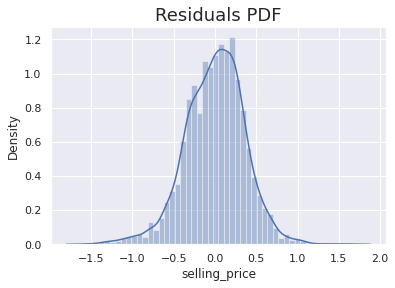

In [ ]:
sns.distplot(y_train - y_hat)

plt.title("Residuals PDF", size=18)

#R2_score of train and test data


In [ ]:
# let's Find the R-squared of the model
reg.score(X_train,y_train)

0.6833006310273194

In [ ]:
# let's calculate Adjusted R-squared
adj_r2 = 1 - ((1-r2)*(300-1)/(300-3-1))
adj_r2

0.6800908401255692

#Random forest regression


In [ ]:
from sklearn.model_selection import train_test_split

y = data_cleaned['selling_price']

X = data_cleaned.drop(['selling_price'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)
X_test = pd.get_dummies(X_test, drop_first=True)
cols_test  = X_test.columns
len(cols_test)

12

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
rf = RandomForestRegressor(n_estimators=400,
max_depth=None,
min_samples_split=28,
min_samples_leaf=14)
rf.fit(X_train,y_train)  

RandomForestRegressor(min_samples_leaf=14, min_samples_split=28,
                      n_estimators=400)

In [ ]:
y_pred = rf.predict(X_test)
y_pred

array([421830.83265439, 706219.43931607, 465576.0457119 , ...,
       469112.90142653, 339937.84539425, 519621.52792115])

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 114758.70121451156
Mean Squared Error: 24761104524.50768
Root Mean Squared Error: 157356.61576339166


In [ ]:
# Visualising the Random Forest Regression results
#import numpy as np
#X_grid = np.arange(min(X), max(X), 0.01) 
X#_grid = X_grid.reshape((len(X_grid), 1))

#plt.scatter(X, y, color = 'blue') 
#plt.plot(X_grid, rf.predict(X_grid), 
#         color = 'green') 
#plt.title('Random Forest Regression')
#plt.xlabel('Position level')
#plt.ylabel('Salary')
#plt.show()

In [ ]:
rf.score(X_train,y_train)

0.6905615226366268

In [ ]:
rf.score(X_test,y_test)

0.6157781046989623

here we can see the random forest regression score for trian and test data is nearly matching

#KNN regressor

In [ ]:
from sklearn.model_selection import train_test_split

y = data_cleaned['selling_price']

X = data_cleaned.drop(['selling_price'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)

In [ ]:
X_test = pd.get_dummies(X_test, drop_first=True)

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# firstly let's scale the data 

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)



In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=2)

In [ ]:
print(RegModel)

KNeighborsRegressor(n_neighbors=2)


In [ ]:
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

In [ ]:
sqrt(mean_squared_error(y_test,prediction))
                                

203167.10609762548

In [ ]:
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

R2 Value: 0.7553892533335672


In [ ]:
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

Accuracy 61.65826377595787
